# Lezione 2: Regressione Lineare - Prevedere il Futuro 📈

Nella lezione precedente abbiamo visto come un programma può seguire regole fisse. Ma se volessimo fare una **previsione**? Ad esempio, se studio 8 ore per un esame, che voto posso aspettarmi di prendere?

Questo è un compito di **regressione**: l'obiettivo è prevedere un valore numerico continuo (un voto, un prezzo, una temperatura...) basandosi su altri dati.

L'algoritmo più semplice per farlo è la **Regressione Lineare**. L'idea è tanto semplice quanto potente: cercheremo di tracciare una **linea retta** che rappresenti al meglio la relazione tra i nostri dati.

### 1. I Dati di Partenza

Iniziamo creando dei dati finti (un dataset "sintetico"). Immaginiamo di avere i dati di alcuni studenti: le ore che hanno dedicato allo studio e il voto che hanno ottenuto all'esame.

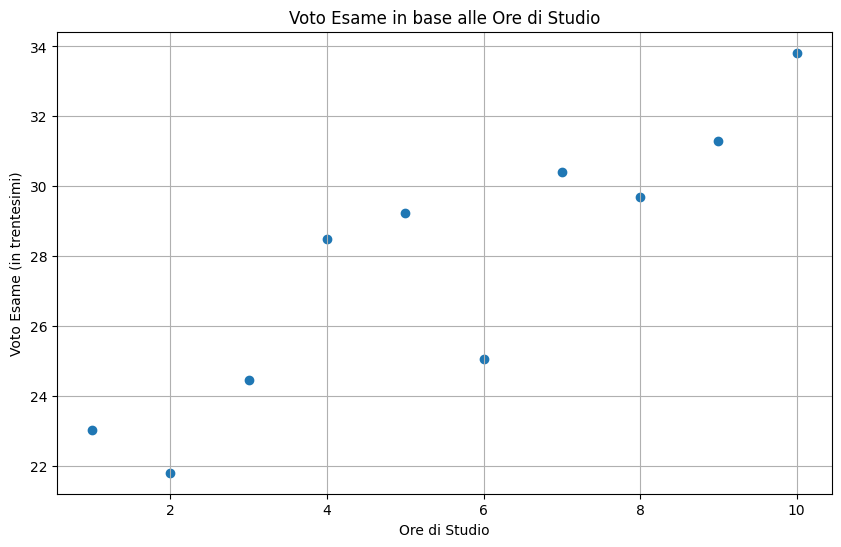

In [10]:
# Importiamo le librerie che ci servono:
# - NumPy per calcoli matematici
# - Matplotlib per creare grafici
import numpy as np
import matplotlib.pyplot as plt

# Creiamo dati finti ma realistici
# np.random.seed(0) fa in modo che i dati casuali siano sempre gli stessi ogni volta che eseguiamo il codice
np.random.seed(0)

# X = Ore di studio (10 studenti, da 1 a 10 ore)
# Lo trasformiamo in un array colonna con .reshape(-1, 1) perché i modelli di ML lo vogliono in questo formato
X = np.array(range(1, 11)).reshape(-1, 1)

# y = Voto esame. La base è X*1.5 (più studi, più il voto sale),
# ma aggiungiamo del "rumore" casuale per renderlo più realistico.
# Non tutti quelli che studiano 5 ore prendono esattamente lo stesso voto!
y = (X * 1.5 + np.random.randn(10, 1) * 2) + 18 # Aggiungiamo 18 per simulare voti in trentesimi

# Visualizziamo i dati con un grafico a dispersione (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title('Voto Esame in base alle Ore di Studio')
plt.xlabel('Ore di Studio')
plt.ylabel('Voto Esame (in trentesimi)')
plt.grid(True)
plt.show()

Guardando il grafico, vedi che i punti seguono una tendenza? Sembra proprio che all'aumentare delle ore di studio, il voto tenda a salire. I punti non formano una linea perfetta a causa del "rumore" (altri fattori: stanchezza, fortuna, difficoltà del compito...), ma la relazione è evidente.

**Il nostro obiettivo è trovare la singola linea retta che "passa in mezzo" a questi punti nel miglior modo possibile.**

Questa linea sarà il nostro **modello**. Una volta trovata, potremo usarla per fare previsioni su studenti futuri! Ad esempio, potremo chiederle: "Quale voto prenderà uno studente che ha studiato 7 ore?".

✅ Modello addestrato con successo!


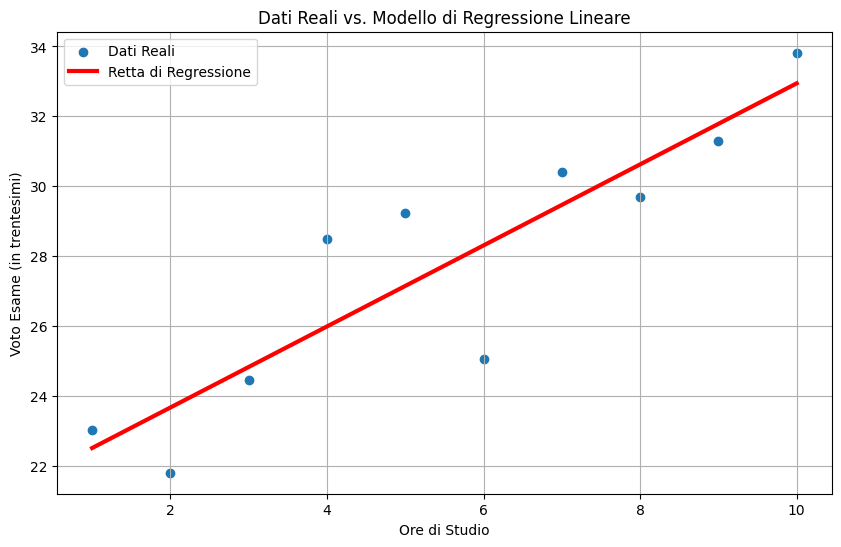

In [2]:
# Importiamo la classe per la Regressione Lineare da scikit-learn,
# la libreria di Machine Learning più famosa in Python.
from sklearn.linear_model import LinearRegression

# 1. Creiamo il modello
# Immaginiamolo come un "cervello" vuoto, specializzato nel trovare linee rette.
modello = LinearRegression()

# 2. Addestriamo il modello
# Usiamo il metodo .fit() per "dare in pasto" i nostri dati (X e y) al modello.
# Il modello analizzerà i punti e calcolerà la retta migliore. Questo è l'apprendimento!
modello.fit(X, y)

print("✅ Modello addestrato con successo!")

# 3. Facciamo le previsioni
# Chiediamo al modello addestrato di calcolare i valori sulla retta per ogni nostra X.
predizioni = modello.predict(X)

# Ora visualizziamo tutto: i dati originali e la retta trovata dal modello
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dati Reali') # I punti blu sono i dati originali
plt.plot(X, predizioni, color='red', linewidth=3, label='Retta di Regressione') # La linea rossa è il nostro modello
plt.title('Dati Reali vs. Modello di Regressione Lineare')
plt.xlabel('Ore di Studio')
plt.ylabel('Voto Esame (in trentesimi)')
plt.legend()
plt.grid(True)
plt.show()

Come puoi vedere dal grafico, la linea rossa non tocca perfettamente tutti i punti (sarebbe impossibile!), ma li riassume nel miglior modo possibile. Ha "imparato" la relazione generale tra studio e voti.

### Ora usiamolo!
Adesso che il nostro modello è addestrato, possiamo usarlo per fare previsioni su dati che non ha mai visto.
Cosa succede se uno studente studia **7.5 ore**?

In [5]:
# Dobbiamo fornire i nuovi dati con lo stesso formato di prima (un array colonna)
ore_nuovo_studente = np.array([[7.5]])

# Usiamo il metodo .predict() sul nostro modello addestrato
voto_previsto = modello.predict(ore_nuovo_studente)

# L'output è un array, quindi prendiamo il primo elemento con [0]
print(f"Previsione del modello: uno studente che studia {ore_nuovo_studente[0][0]} ore potrebbe prendere un voto di circa {voto_previsto[0]}")

Previsione del modello: uno studente che studia 7.5 ore potrebbe prendere un voto di circa [30.04550226]
